# Predicting Claims Severity
### (Allstate Kaggle competition)
## Capstone Project
### George, Xia, Autumn, Mandy


In [1]:
#Import the packages, bring in the data

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Force pandas to not abbreviate columns
pd.set_option("display.max_columns",999)
pd.set_option("display.max_rows",120)

In [3]:
#Read in the data

allstate_train = pd.read_csv("train.csv")

In [4]:
allstate_train.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat80,cat81,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,D,B,B,D,D,B,D,C,B,D,B,A,A,A,A,A,D,B,C,E,A,C,T,B,G,A,A,I,E,G,J,G,BU,BC,C,AS,S,A,O,LB,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,D,D,A,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,L,F,A,A,E,E,I,K,K,BI,CQ,A,AV,BM,A,O,DP,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,B,B,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,B,D,B,D,C,B,B,B,A,A,A,A,A,D,D,C,E,E,A,D,L,O,A,B,E,F,H,F,A,AB,DK,A,C,AF,A,I,GK,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,D,B,B,D,D,D,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,I,D,A,A,E,E,I,K,K,BI,CS,C,N,AE,A,O,DJ,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,D,B,D,B,D,B,B,C,B,B,C,A,A,A,B,H,D,B,D,E,E,A,P,F,J,A,A,D,E,K,G,B,H,C,C,Y,BM,A,K,CK,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [5]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 002F-D488

 Directory of C:\Users\gnakhleh\Documents\capstone

01/19/2017  11:58 AM    <DIR>          .
01/19/2017  11:58 AM    <DIR>          ..
01/19/2017  08:54 AM    <DIR>          .ipynb_checkpoints
01/19/2017  11:58 AM         1,019,376 capstone_eda_gn.ipynb
01/19/2017  08:51 AM        45,715,862 test.csv
01/19/2017  08:51 AM        70,025,339 train.csv
               3 File(s)    116,760,577 bytes
               3 Dir(s)  666,148,622,336 bytes free


** What are the basics of the dataset? **

In [6]:
#Shape of the dataset
allstate_train.shape

(188318, 132)

There are over 188k records, and 132 variables

In [7]:
#Number of NA values
np.sum(np.array(pd.isnull(allstate_train)),0)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [8]:
#Different way of saying it
pd.isnull(allstate_train).values.any()

False

There are **no blank values** in the training data, so that's nice

** Summary statistics **

In [9]:
allstate_train.describe(include = 'all')

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat80,cat81,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
unique,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,8,7,8,7,5,7,5,8,7,5,16,15,19,9,13,17,20,17,20,11,84,131,16,51,61,19,23,326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,D,D,B,B,C,B,B,B,A,A,A,A,A,D,D,C,E,C,A,P,F,A,A,A,E,E,G,F,B,BI,CL,A,E,BM,A,K,HK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,141550,106721,177993,128395,123737,131693,183744,177274,113122,160213,168186,159825,168851,186041,188284,181843,187009,187331,186510,188114,187905,188275,157445,181977,169969,177119,168250,180938,184593,184760,182980,187107,187361,187734,188105,156313,165729,169323,183393,180119,181177,186623,184110,172716,183991,187436,187617,188049,179127,137611,187071,179505,172949,183762,188173,188136,185296,188079,188018,187872,187596,188273,188239,188271,186056,179982,187626,188176,188011,188295,178646,118322,154275,184731,154307,181347,187503,186526,152929,137505,154385,147536,141534,154939,186005,103852,166992,168926,183744,177993,111028,124689,150237,121642,87531,174360,78127,105492,79455,42970,106721,177274,123737,42925,76493,47165,47310,65512,152918,25305,128395,25148,26191,131693,43866,21061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,294135.982561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,169336.084867,NaN,NaN,NaN,NaN,NaN,NaN,

This is a lot to look at, but all the basic stats are here for each variable

Let's look at the target variable: `loss`

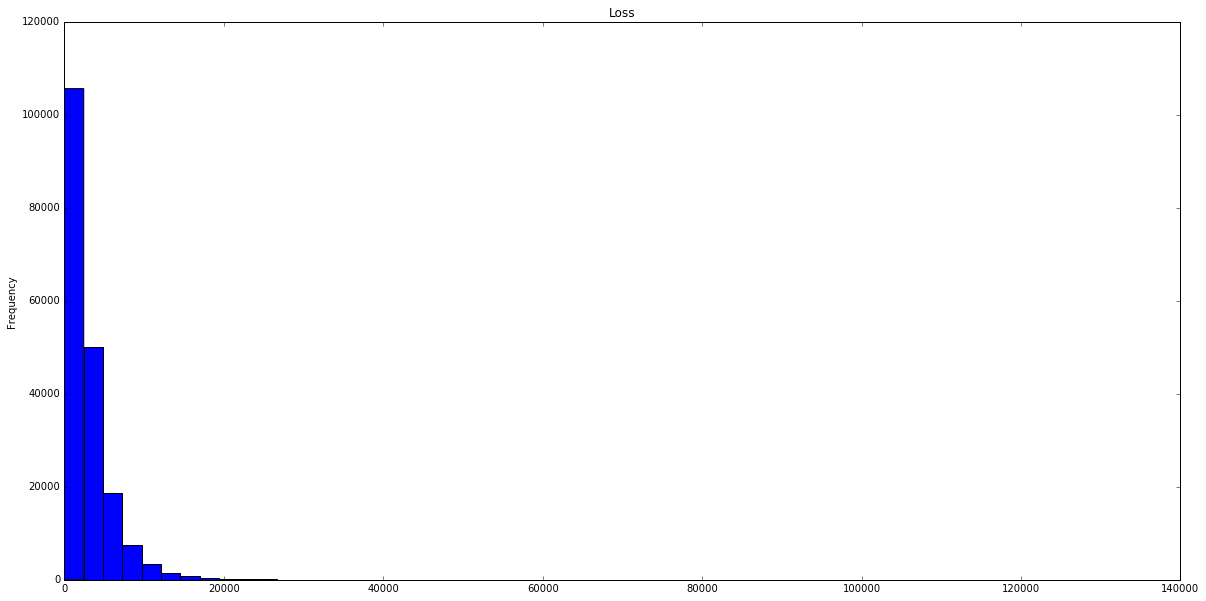

In [10]:
allstate_train.loss.plot(kind='hist', bins=50, figsize=(20,10), title="Loss")

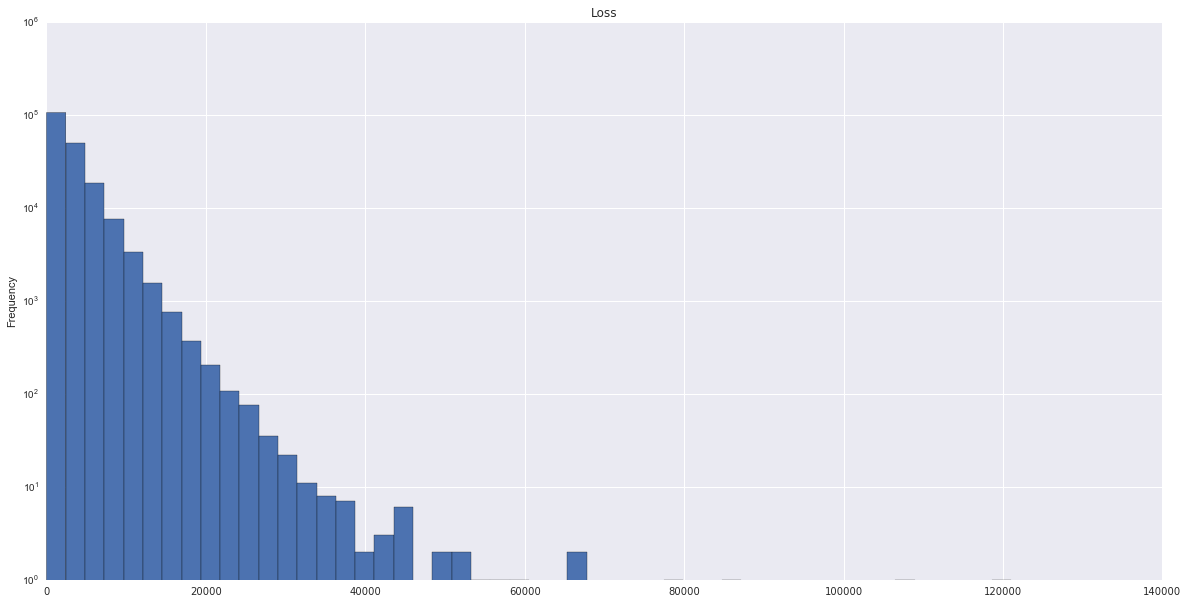

In [46]:
allstate_train.loss.plot(kind='hist', bins=50, figsize=(20,10), title="Loss", logy=True)

We can see that the distribution of claims cost to Allstate isn't normal. We might try looking at the log of loss instead

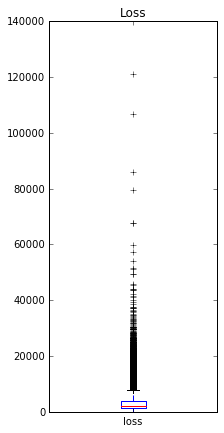

In [12]:
#Here's a boxplot to show what's going on in a different way
allstate_train.loss.plot(kind = 'box', figsize=(3, 7), title="Loss")

Looking at the Loss data, let's dig into those outliers a bit

In [13]:
#what % of claims have loss > 10k
allstate_train[allstate_train['loss'] >= 10000].shape[0] / allstate_train.shape[0]

0.03122378105120063

In [14]:
#What % of total cost do those >10k claims account for?
allstate_train[allstate_train['loss'] >= 10000]['loss'].sum() / allstate_train['loss'].sum()

0.14162590403044667

In [15]:
#Same thing, but for $20k
allstate_train[allstate_train['loss'] >= 20000].shape[0] / allstate_train.shape[0]

0.0023258530783037204

In [16]:
#$20k as a % of total claims cost
allstate_train[allstate_train['loss'] >= 20000]['loss'].sum() / allstate_train['loss'].sum()

0.019888807703067595

In [17]:
#$20k claims total cost in dollars
allstate_train[allstate_train['loss'] >= 20000]['loss'].sum()

11376106.800000014

### Let's take a second here to appreciate the problem  
This column `loss` is about how much money Allstate loses from any given claim (row in this data)  
Of these claims, 75% result in a loss of about \$3,800 or less   
**But there are many huge outliers**: **3%** of claims are \$10k or more   
That 3% of claims accounts for 14% of total loss in dollars that's represented in the dataset  
**Even more extreme**: claims of \$20k or more account for around 0.03% of the data, but those claims account for almost 2% of total loss in the dataset (not insignificant when you're a big company like Allstate: **\$11,376,106**)  

In [18]:
#Lets look at the datatype of each variable

allstate_train.dtypes

id          int64
cat1       object
cat2       object
cat3       object
cat4       object
cat5       object
cat6       object
cat7       object
cat8       object
cat9       object
cat10      object
cat11      object
cat12      object
cat13      object
cat14      object
cat15      object
cat16      object
cat17      object
cat18      object
cat19      object
cat20      object
cat21      object
cat22      object
cat23      object
cat24      object
cat25      object
cat26      object
cat27      object
cat28      object
cat29      object
cat30      object
cat31      object
cat32      object
cat33      object
cat34      object
cat35      object
cat36      object
cat37      object
cat38      object
cat39      object
cat40      object
cat41      object
cat42      object
cat43      object
cat44      object
cat45      object
cat46      object
cat47      object
cat48      object
cat49      object
cat50      object
cat51      object
cat52      object
cat53      object
cat54      object
cat55     

There are 3 types of data in the dataframe: object, int, and float

### Visualizing the variables  
** Plotting distributions and bar charts for each variable **

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000009FD2DA0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000A369FD0>]], dtype=object)

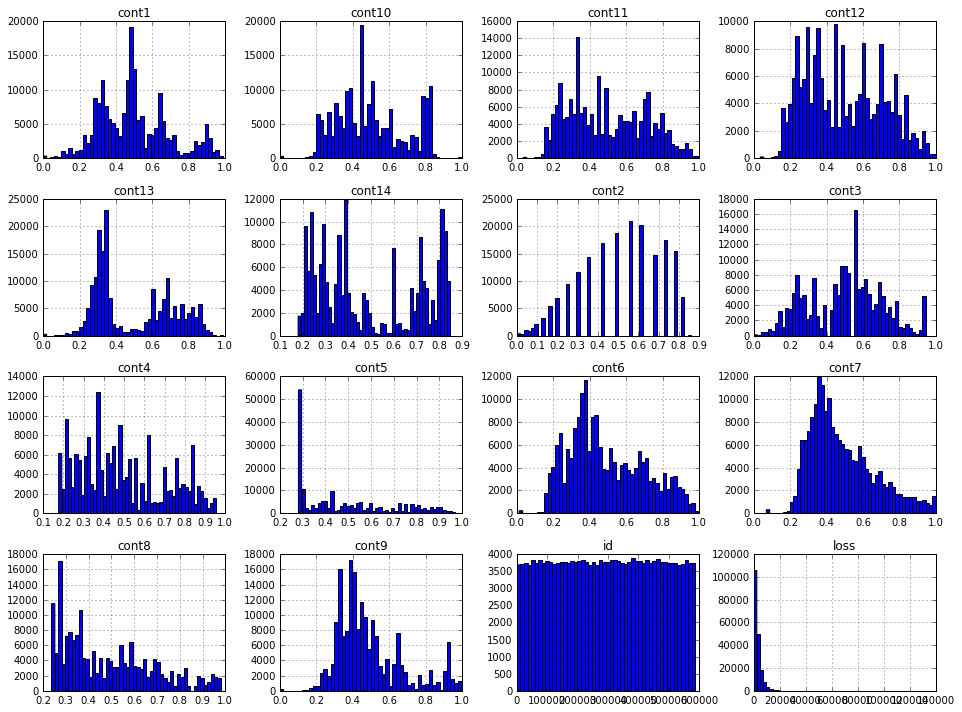

In [19]:
#Lets try to make graphs of all the distributions

allstate_train.hist(bins=50, figsize=(16,12))

In [26]:
#What if we wanted to easily select every continuous variable?

#A new dataframe of just the continuous variables
cont_df = allstate_train.select_dtypes(include=['float64'])
#cont_df.drop('loss', axis=1, inplace=True)

#a list of all the continuous variable names, for easy selection
cont_names = list(cont_df.columns.values)

In [21]:
#Same thing, but for categorical variables

cat_df = allstate_train.select_dtypes(include=['object'])

cat_names = list(cat_df.columns.values)

C:\Anaconda3\lib\site-packages\matplotlib\pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


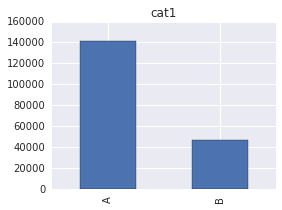

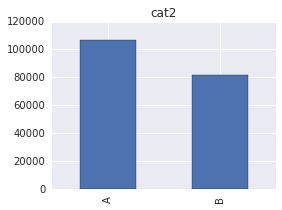

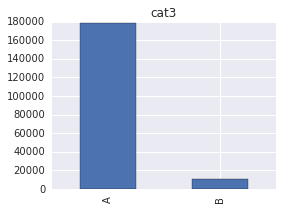

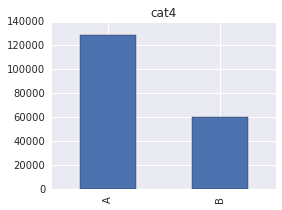

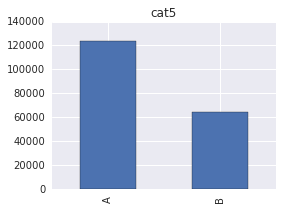

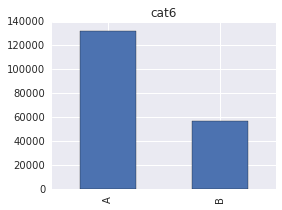

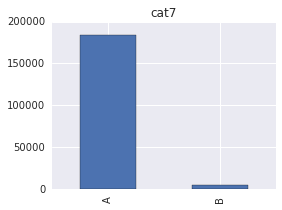

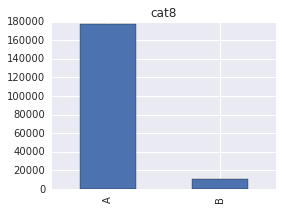

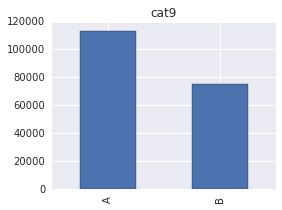

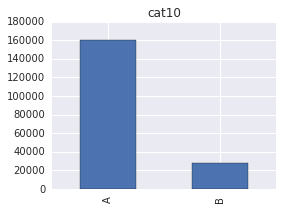

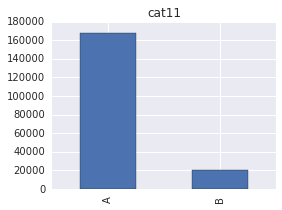

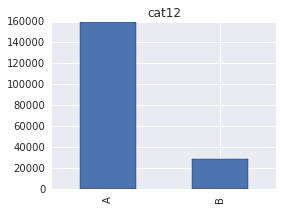

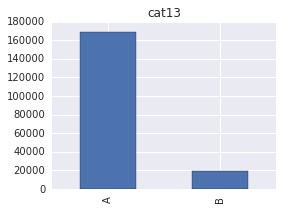

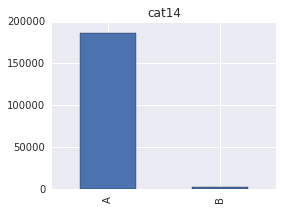

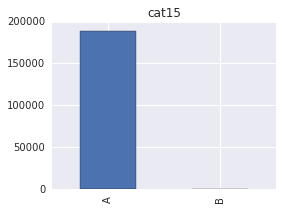

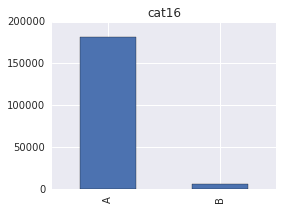

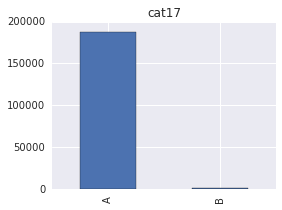

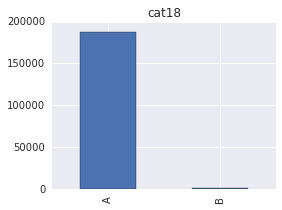

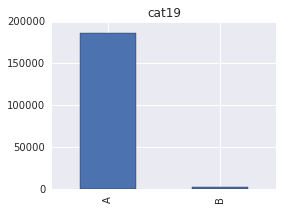

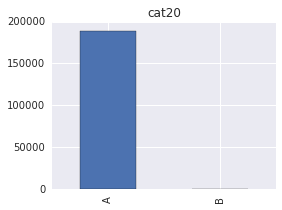

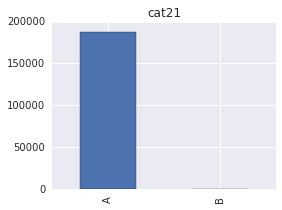

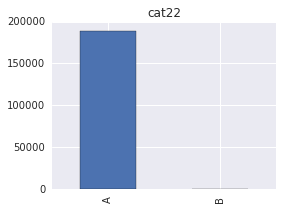

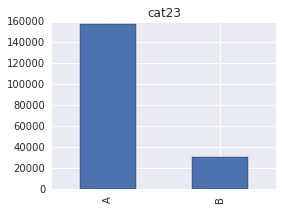

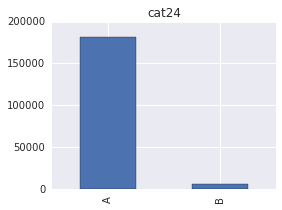

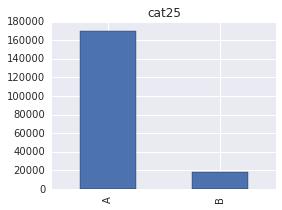

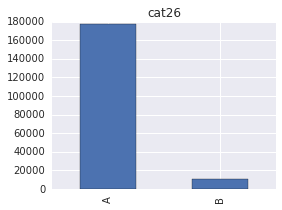

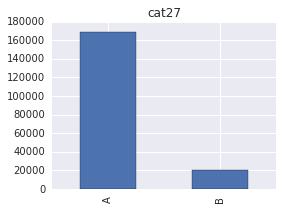

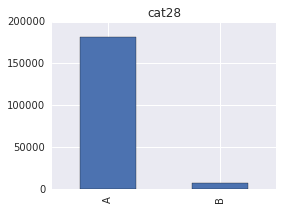

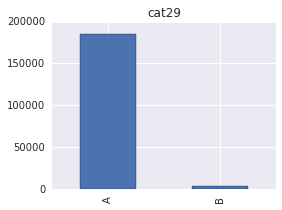

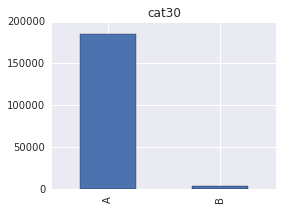

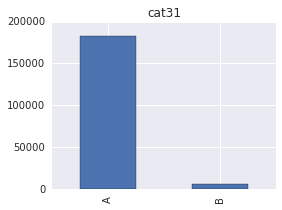

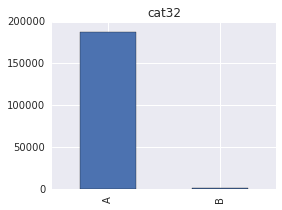

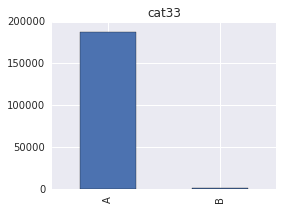

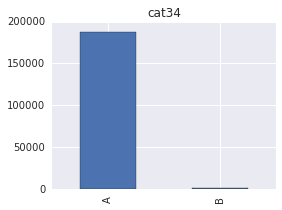

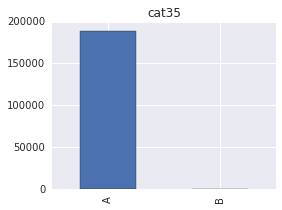

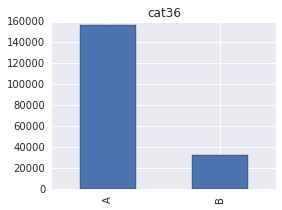

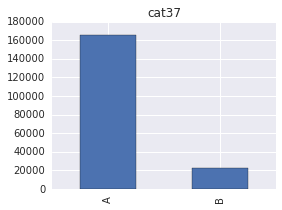

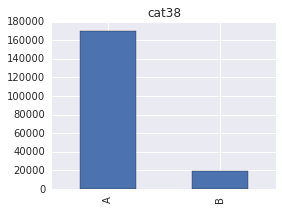

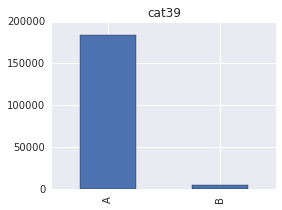

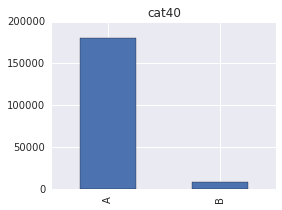

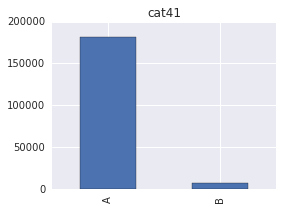

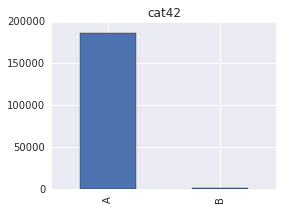

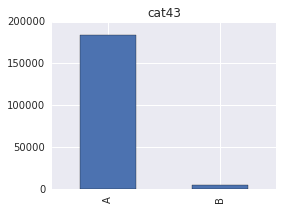

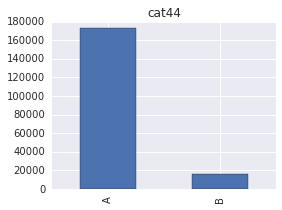

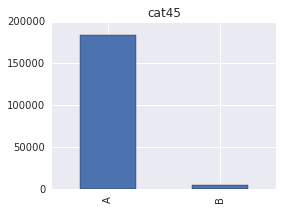

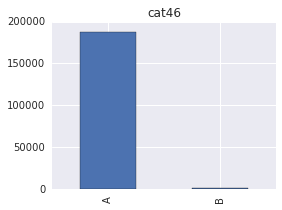

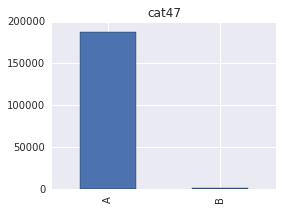

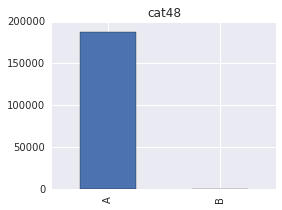

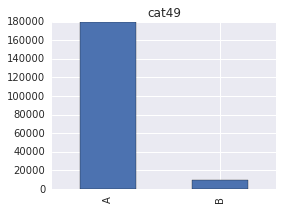

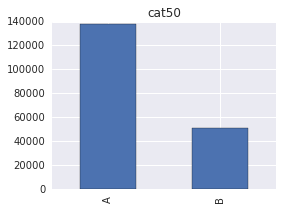

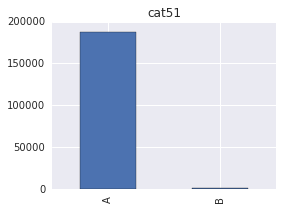

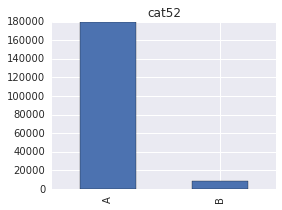

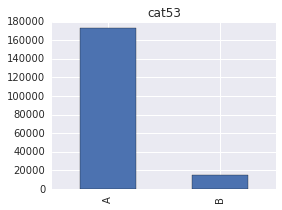

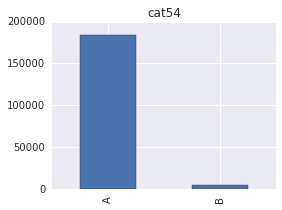

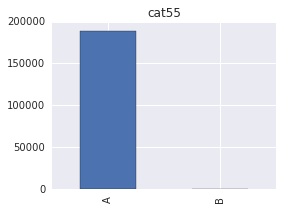

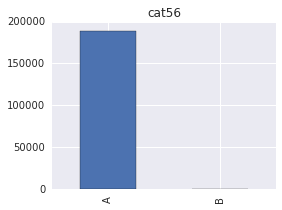

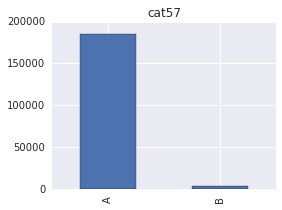

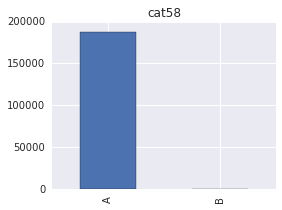

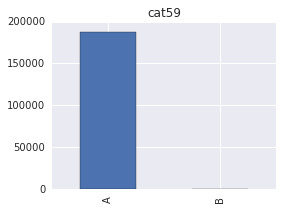

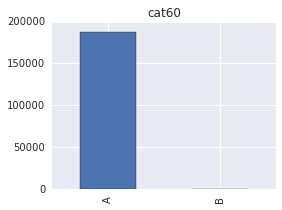

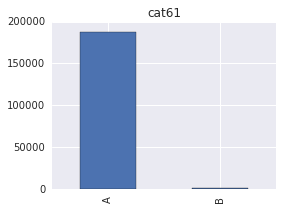

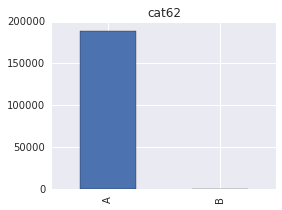

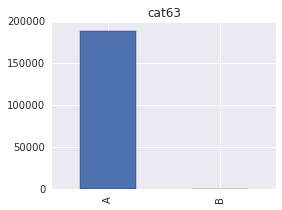

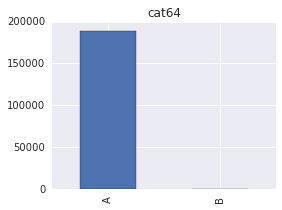

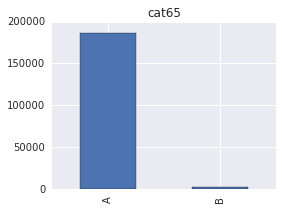

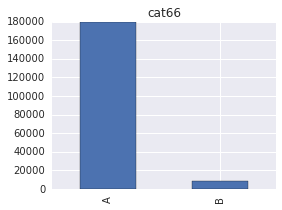

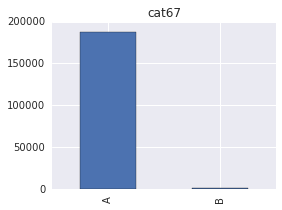

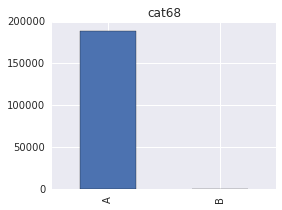

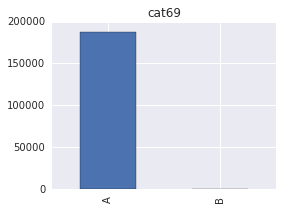

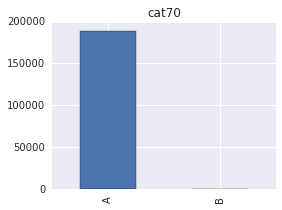

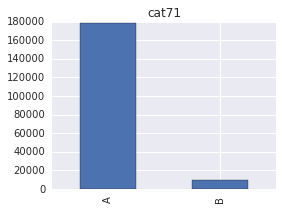

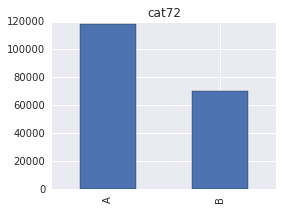

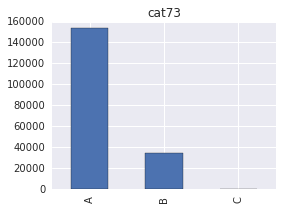

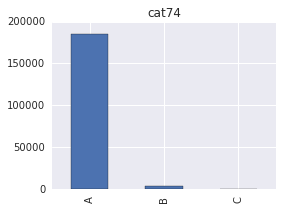

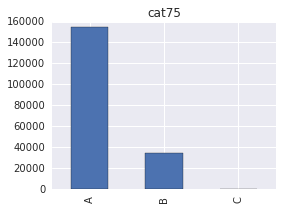

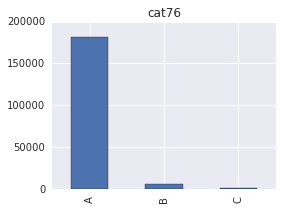

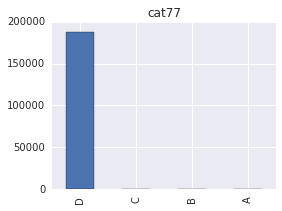

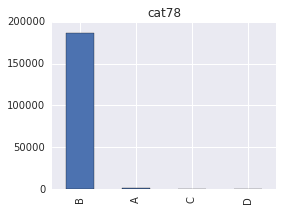

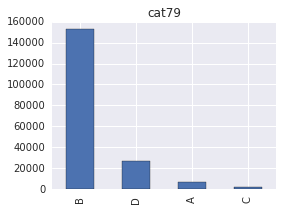

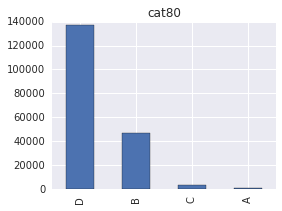

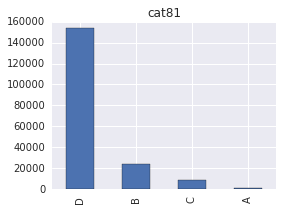

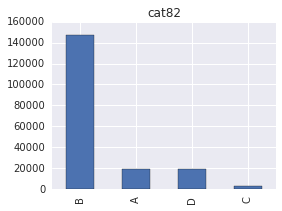

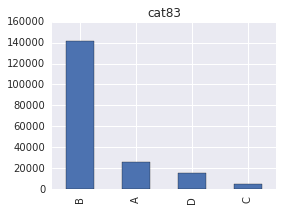

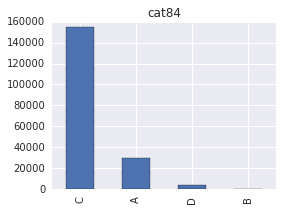

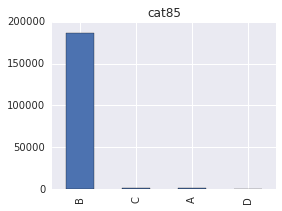

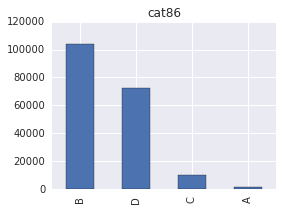

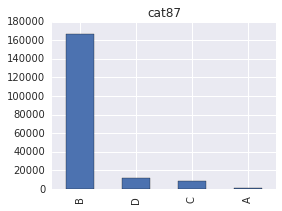

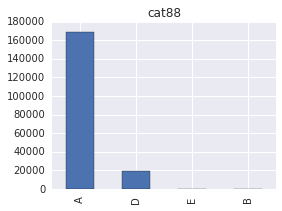

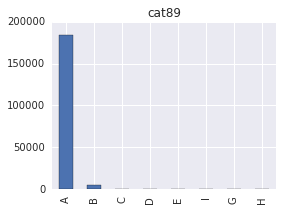

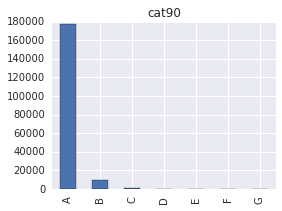

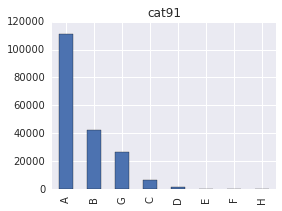

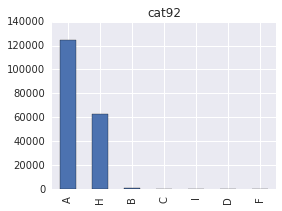

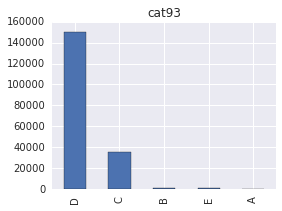

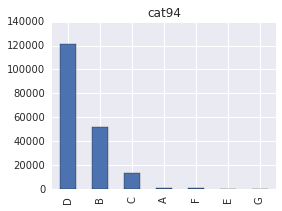

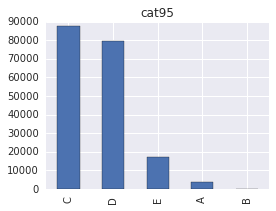

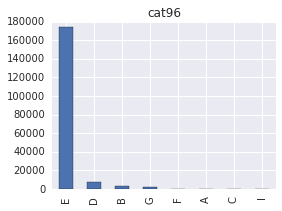

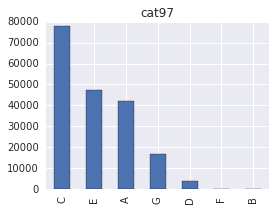

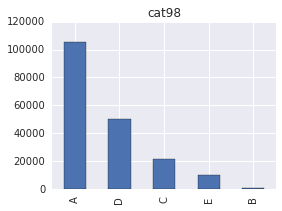

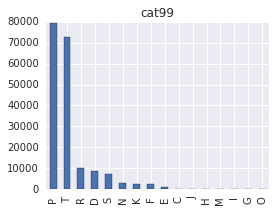

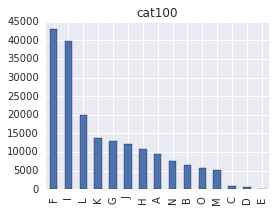

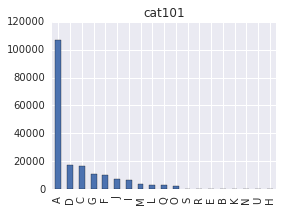

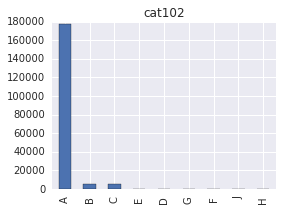

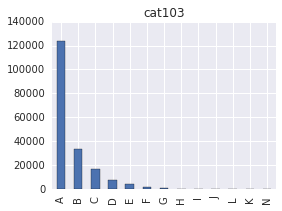

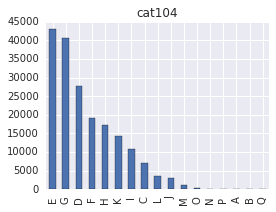

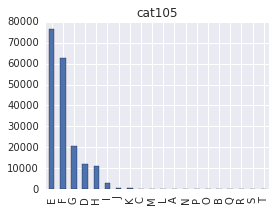

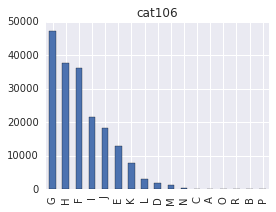

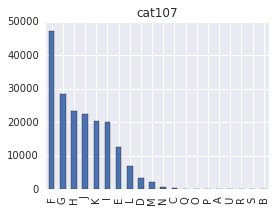

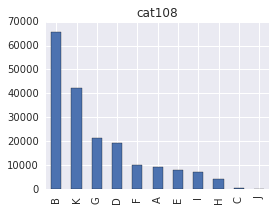

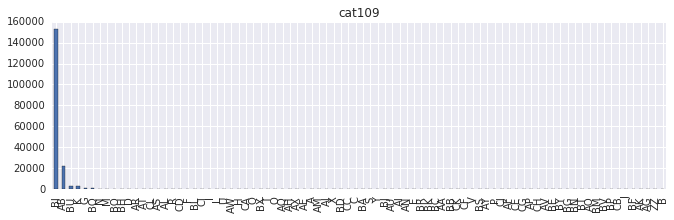

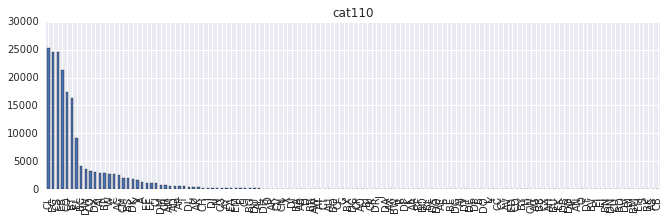

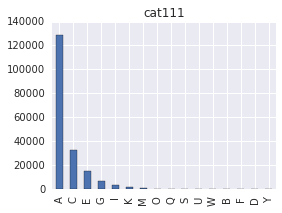

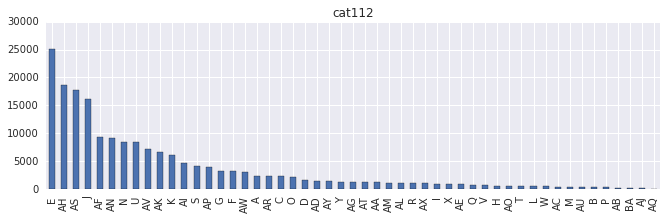

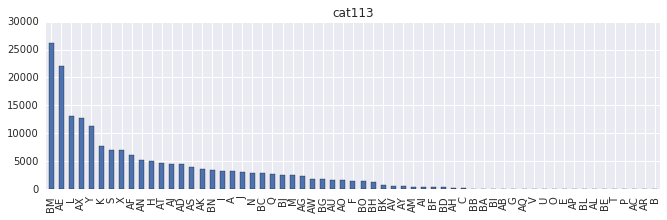

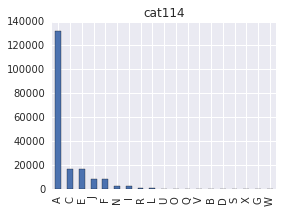

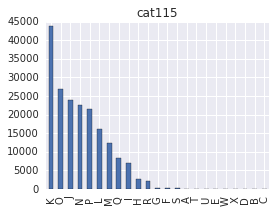

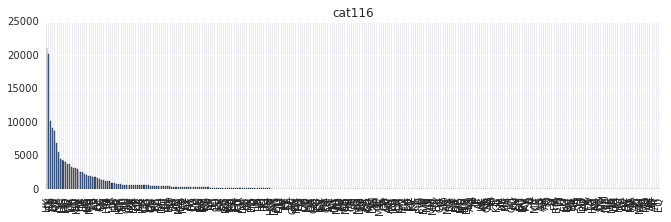

In [43]:
#bar charts for all the categorical variables

for name in cat_names:
    if name in ['cat109','cat110','cat112','cat113','cat116']:
        plt.figure()
        allstate_train[name].value_counts().plot(kind='bar', title=name, figsize = (11, 3))
    else:
        plt.figure()
        allstate_train[name].value_counts().plot(kind='bar', title=name, figsize = (4,3))

In [73]:
#cat116 is a bit odd: categorical but TONS of classes

print("Unique values in cat116: {}".format(allstate_train.cat116.nunique()))
allstate_train.cat116.value_counts()

#print(sum(allstate_train.cat116.value_counts()>20) / allstate_train.cat116.nunique() )

allstate_train.cat116.value_counts()

Unique values in cat116: 326


HK    21061
DJ    20244
CK    10162
DP     9202
GS     8736
CR     6862
HX     5629
DC     4557
HG     4414
IE     4225
HQ     4044
HV     3853
GC     3803
LM     3277
LB     3194
LN     3127
KW     3085
HJ     2741
GK     2632
DF     2519
IG     2269
LO     2082
HB     2007
MD     1960
CB     1909
LF     1873
GI     1835
BY     1620
KC     1513
GE     1399
LY     1327
CI     1314
HN     1302
IH     1168
JR     1013
HA      975
CS      934
HC      810
FR      789
HM      764
EC      708
IC      708
MJ      701
CW      699
DK      684
EK      639
LW      635
FB      619
IF      617
KA      613
HL      607
HH      597
GX      595
GU      591
LQ      589
DS      553
GN      536
KR      519
FC      502
GA      495
      ...  
Q         2
CJ        2
D         2
X         2
FK        2
BM        2
FJ        2
W         2
JO        1
FO        1
KH        1
BC        1
AS        1
EV        1
IR        1
AR        1
FI        1
JI        1
DQ        1
FQ        1
AP        1
JK        1
FS  

What we are looking at above is, for `cat116`, what % of records are a given class. For example, 11% of records have a value of "HK" for cat116 variable. Many of these possible classes only have 1 response. In other words, they don't contribute much information. When we start thinking about creating dummy variables out of the categorical ones, this is an important thing to know: do we really want a new variable where 99.99% of records are 0? That won't be predictive.  

On the other hand, we agreed that outliers for the `loss` variable are really important: they're the most costly claims and Allstate would want to predict those. What if these records w/ extreme `loss` values are hiding in these low-response classes for certain variables?  

For now, we'll probably drop them, but if the models can't accurately predict extreme `loss` values, then we'll come back to this point

In [27]:
cont_df.corr()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
cont1,1.000000,-0.085180,-0.445431,0.367549,-0.025230,0.758315,0.367384,0.361163,0.929912,0.808551,0.596090,0.614225,0.534850,0.056688,-0.010237
cont2,-0.085180,1.000000,0.455861,0.038693,0.191427,0.015864,0.048187,0.137468,-0.032729,0.063526,0.116824,0.106250,0.023335,-0.045584,0.141528
cont3,-0.445431,0.455861,1.000000,-0.341633,0.089417,-0.349278,0.097516,-0.185432,-0.417054,-0.325562,0.025271,0.006111,-0.418203,-0.039592,0.111053
cont4,0.367549,0.038693,-0.341633,1.000000,0.163748,0.220932,-0.115064,0.528740,0.328961,0.283294,0.120927,0.130453,0.179342,0.017445,-0.035831
cont5,-0.025230,0.191427,0.089417,0.163748,1.000000,-0.149810,-0.249344,0.009015,-0.088202,-0.064967,-0.151548,-0.148217,-0.082915,-0.021638,-0.011355
cont6,0.758315,0.015864,-0.349278,0.220932,-0.149810,1.000000,0.658918,0.437437,0.797544,0.883351,0.773745,0.785144,0.815091,0.042178,0.040967
cont7,0.367384,0.048187,0.097516,-0.115064,-0.249344,0.658918,1.000000,0.142042,0.384343,0.492621,0.747108,0.742712,0.288395,0.022286,0.119799
cont8,0.361163,0.137468,-0.185432,0.528740,0.009015,0.437437,0.142042,1.000000,0.452658,0.336588,0.302381,0.315904,0.476402,0.043539,0.030508
cont9,0.929912,-0.032729,-0.417054,0.328961,-0.088202,0.797544,0.384343,0.452658,1.000000,0.785697,0.608000,0.626656,0.642028,0.074154,0.014456
cont10,0.808551,0.063526,-0.325562,0.283294,-0.064967,0.883351,0.492621,0.336588,0.785697,1.000000,0.702896,0.713812,0.707876,0.041808,0.020236


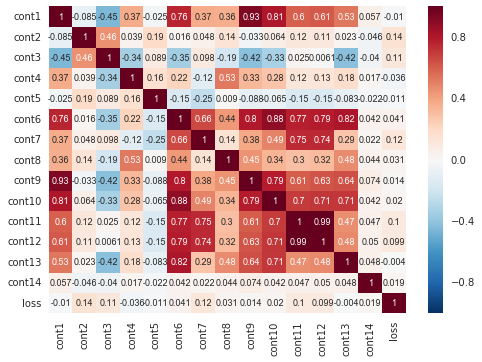

In [44]:
#A correlation plot of all continuous variables

import seaborn as sns

corr_mat = cont_df.corr()

sns.heatmap(corr_mat, annot=True, annot_kws={"size": 9})

Loss isn't super correlated w/ any of these continuous variables

In [48]:
cat_dummy_df = pd.get_dummies(cat_df)

print("New size: {}".format(cat_dummy_df.shape))
print("Original size: {}".format(cat_df.shape))

New size: (188318, 1139)
Original size: (188318, 116)


In [49]:
print(cat_names)

['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17', 'cat18', 'cat19', 'cat20', 'cat21', 'cat22', 'cat23', 'cat24', 'cat25', 'cat26', 'cat27', 'cat28', 'cat29', 'cat30', 'cat31', 'cat32', 'cat33', 'cat34', 'cat35', 'cat36', 'cat37', 'cat38', 'cat39', 'cat40', 'cat41', 'cat42', 'cat43', 'cat44', 'cat45', 'cat46', 'cat47', 'cat48', 'cat49', 'cat50', 'cat51', 'cat52', 'cat53', 'cat54', 'cat55', 'cat56', 'cat57', 'cat58', 'cat59', 'cat60', 'cat61', 'cat62', 'cat63', 'cat64', 'cat65', 'cat66', 'cat67', 'cat68', 'cat69', 'cat70', 'cat71', 'cat72', 'cat73', 'cat74', 'cat75', 'cat76', 'cat77', 'cat78', 'cat79', 'cat80', 'cat81', 'cat82', 'cat83', 'cat84', 'cat85', 'cat86', 'cat87', 'cat88', 'cat89', 'cat90', 'cat91', 'cat92', 'cat93', 'cat94', 'cat95', 'cat96', 'cat97', 'cat98', 'cat99', 'cat100', 'cat101', 'cat102', 'cat103', 'cat104', 'cat105', 'cat106', 'cat107', 'cat108', 'cat109', 'cat110', 'cat111

In [50]:
cat_dummy_df.head()

,cat1_A,cat1_B,cat2_A,cat2_B,cat3_A,cat3_B,cat4_A,cat4_B,cat5_A,cat5_B,cat6_A,cat6_B,cat7_A,cat7_B,cat8_A,cat8_B,cat9_A,cat9_B,cat10_A,cat10_B,cat11_A,cat11_B,cat12_A,cat12_B,cat13_A,cat13_B,cat14_A,cat14_B,cat15_A,cat15_B,cat16_A,cat16_B,cat17_A,cat17_B,cat18_A,cat18_B,cat19_A,cat19_B,cat20_A,cat20_B,cat21_A,cat21_B,cat22_A,cat22_B,cat23_A,cat23_B,cat24_A,cat24_B,cat25_A,cat25_B,cat26_A,cat26_B,cat27_A,cat27_B,cat28_A,cat28_B,cat29_A,cat29_B,cat30_A,cat30_B,cat31_A,cat31_B,cat32_A,cat32_B,cat33_A,cat33_B,cat34_A,cat34_B,cat35_A,cat35_B,cat36_A,cat36_B,cat37_A,cat37_B,cat38_A,cat38_B,cat39_A,cat39_B,cat40_A,cat40_B,cat41_A,cat41_B,cat42_A,cat42_B,cat43_A,cat43_B,cat44_A,cat44_B,cat45_A,cat45_B,cat46_A,cat46_B,cat47_A,cat47_B,cat48_A,cat48_B,cat49_A,cat49_B,cat50_A,cat50_B,cat51_A,cat51_B,cat52_A,cat52_B,cat53_A,cat53_B,cat54_A,cat54_B,cat55_A,cat55_B,cat56_A,cat56_B,cat57_A,cat57_B,cat58_A,cat58_B,cat59_A,cat59_B,cat60_A,cat60_B,cat61_A,cat61_B,cat62_A,cat62_B,cat63_A,cat63_B,cat64_A,cat64_B,cat65_A,cat65_B,cat66_A,cat66_B,cat67_A,cat67_B,cat68_A,cat68_B,cat69_A,cat69_B,cat70_A,cat70_B,cat71_A,cat71_B,cat72_A,cat72_B,cat73_A,cat73_B,cat73_C,cat74_A,cat74_B,cat74_C,cat75_A,cat75_B,cat75_C,cat76_A,cat76_B,cat76_C,cat77_A,cat77_B,cat77_C,cat77_D,cat78_A,cat78_B,cat78_C,cat78_D,cat79_A,cat79_B,cat79_C,cat79_D,cat80_A,cat80_B,cat80_C,cat80_D,cat81_A,cat81_B,cat81_C,cat81_D,cat82_A,cat82_B,cat82_C,cat82_D,cat83_A,cat83_B,cat83_C,cat83_D,cat84_A,cat84_B,cat84_C,cat84_D,cat85_A,cat85_B,cat85_C,cat85_D,cat86_A,cat86_B,cat86_C,cat86_D,cat87_A,cat87_B,cat87_C,cat87_D,cat88_A,cat88_B,cat88_D,cat88_E,cat89_A,cat89_B,cat89_C,cat89_D,cat89_E,cat89_G,cat89_H,cat89_I,cat90_A,cat90_B,cat90_C,cat90_D,cat90_E,cat90_F,cat90_G,cat91_A,cat91_B,cat91_C,cat91_D,cat91_E,cat91_F,cat91_G,cat91_H,cat92_A,cat92_B,cat92_C,cat92_D,cat92_F,cat92_H,cat92_I,cat93_A,cat93_B,cat93_C,cat93_D,cat93_E,cat94_A,cat94_B,cat94_C,cat94_D,cat94_E,cat94_F,cat94_G,cat95_A,cat95_B,cat95_C,cat95_D,cat95_E,cat96_A,cat96_B,cat96_C,cat96_D,cat96_E,cat96_F,cat96_G,cat96_I,cat97_A,cat97_B,cat97_C,cat97_D,cat97_E,cat97_F,cat97_G,cat98_A,cat98_B,cat98_C,cat98_D,cat98_E,cat99_C,cat99_D,cat99_E,cat99_F,cat99_G,cat99_H,cat99_I,cat99_J,cat99_K,cat99_M,cat99_N,cat99_O,cat99_P,cat99_R,cat99_S,cat99_T,cat100_A,cat100_B,cat100_C,cat100_D,cat100_E,cat100_F,cat100_G,cat100_H,cat100_I,cat100_J,cat100_K,cat100_L,cat100_M,cat100_N,cat100_O,cat101_A,cat101_B,cat101_C,cat101_D,cat101_E,cat101_F,cat101_G,cat101_H,cat101_I,cat101_J,cat101_K,cat101_L,cat101_M,cat101_N,cat101_O,cat101_Q,cat101_R,cat101_S,cat101_U,cat102_A,cat102_B,cat102_C,cat102_D,cat102_E,cat102_F,cat102_G,cat102_H,cat102_J,cat103_A,cat103_B,cat103_C,cat103_D,cat103_E,cat103_F,cat103_G,cat103_H,cat103_I,cat103_J,cat103_K,cat103_L,cat103_N,cat104_A,cat104_B,cat104_C,cat104_D,cat104_E,cat104_F,cat104_G,cat104_H,cat104_I,cat104_J,cat104_K,cat104_L,cat104_M,cat104_N,cat104_O,cat104_P,cat104_Q,cat105_A,cat105_B,cat105_C,cat105_D,cat105_E,cat105_F,cat105_G,cat105_H,cat105_I,cat105_J,cat105_K,cat105_L,cat105_M,cat105_N,cat105_O,cat105_P,cat105_Q,cat105_R,cat105_S,cat105_T,cat106_A,cat106_B,cat106_C,cat106_D,cat106_E,cat106_F,cat106_G,cat106_H,cat106_I,cat106_J,cat106_K,cat106_L,cat106_M,cat106_N,cat106_O,cat106_P,cat106_R,cat107_A,cat107_B,cat107_C,cat107_D,cat107_E,cat107_F,cat107_G,cat107_H,cat107_I,cat107_J,cat107_K,cat107_L,cat107_M,cat107_N,cat107_O,cat107_P,cat107_Q,cat107_R,cat107_S,cat107_U,cat108_A,cat108_B,cat108_C,cat108_D,cat108_E,cat108_F,cat108_G,cat108_H,cat108_I,cat108_J,cat108_K,cat109_A,cat109_AA,cat109_AB,cat109_AE,cat109_AF,cat109_AG,cat109_AH,cat109_AI,cat109_AJ,cat109_AK,cat109_AL,cat109_AM,cat109_AN,cat109_AO,cat109_AP,cat109_AQ,cat109_AR,cat109_AS,cat109_AT,cat109_AU,cat109_AV,cat109_AW,cat109_AX,cat109_AY,cat109_B,cat109_BA,cat109_BB,cat109_BC,cat109_BD,cat109_BE,cat109_BF,cat109_BG,cat109_BH,cat109_BI,cat109_BJ,cat109_BK,cat109_BL,cat109_BM,cat109_BN,cat109_BO,cat109_BP,cat109_BQ,cat109_BR,cat109_BS,cat109_BT,cat1

In [100]:
print(len(cont_names))

print(1139+15)

print(allstate_train.shape)

print(cat_df.shape)
print(cont_df.shape)

print(cat_dummy_df.shape[1] + cont_df.shape[1])

15
1154
(188318, 133)
(313864, 116)
(188318, 15)
1154


In [71]:
#lets look at the variance of each of these new dummy variables
#this will tell us how much 'information' is contained in a variable
#in other words, when a variable has low variance, it means almost all the records are the same value
#how would you predict off of that?

cat_dummy_df.var()

cat1_A       0.186671
cat1_B       0.186671
cat2_A       0.245552
cat2_B       0.245552
cat3_A       0.051822
cat3_B       0.051822
cat4_A       0.216950
cat4_B       0.216950
cat5_A       0.225332
cat5_B       0.225332
cat6_A       0.210276
cat6_B       0.210276
cat7_A       0.023699
cat7_B       0.023699
cat8_A       0.055206
cat8_B       0.055206
cat9_A       0.239861
cat9_B       0.239861
cat10_A      0.126970
cat10_B      0.126970
cat11_A      0.095476
cat11_B      0.095476
cat12_A      0.128411
cat12_B      0.128411
cat13_A      0.092688
cat13_B      0.092688
cat14_A      0.011945
cat14_B      0.011945
cat15_A      0.000181
cat15_B      0.000181
cat16_A      0.033201
cat16_B      0.033201
cat17_A      0.006903
cat17_B      0.006903
cat18_A      0.005214
cat18_B      0.005214
cat19_A      0.009509
cat19_B      0.009509
cat20_A      0.001082
cat20_B      0.001082
cat21_A      0.002188
cat21_B      0.002188
cat22_A      0.000228
cat22_B      0.000228
cat23_A      0.137065
cat23_B   

In [74]:
cat_dummy_df.cat116_LT.value_counts() / cat_dummy_df.shape[0]

0.0    0.999745
1.0    0.000255
Name: cat116_LT, dtype: float64

## Still to do:  
#### 1: Combine the training and testing datasets (preserving which is which)
#### 2: Make dummy variables
#### 3: Drop any dummy variables with variance of less than 1%
#### 4: Split the training and testing again: now they've been cleaned in the same way

## Watch out for
#### Do the training and testing datasets look alike: similar responses on categorical variables, similar distributions on continuous ones?
#### ?? Do we need to be normalizing distributions for continuous variables even if they are scaled and centered?

In [75]:
allstate_test = pd.read_csv("test.csv")

In [82]:
#Add in identifiers to the df's for splitting later
allstate_test['source'] = 'test'
allstate_test['loss'] = 'dropme'
allstate_test.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat80,cat81,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,source,loss
0,4,A,B,A,A,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,D,D,B,B,C,B,D,B,A,A,A,A,A,D,C,C,E,C,D,T,H,G,A,A,G,E,I,L,K,BI,BC,A,J,AX,A,Q,HG,0.321594,0.299102,0.246911,0.402922,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562,test,dropme
1,6,A,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,B,A,D,B,B,D,D,B,B,C,B,B,B,A,A,A,A,A,D,D,D,E,A,A,P,B,D,A,A,G,G,G,F,B,BI,CO,E,G,X,A,L,HK,0.634734,0.620805,0.654310,0.946616,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045,test,dropme
2,9,A,B,A,B,B,A,B,A,B,B,A,B,B,B,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,B,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,D,B,B,B,B,B,D,C,B,B,B,A,B,A,A,A,D,D,C,E,E,A,D,G,Q,A,D,D,E,J,G,A,BI,CS,C,U,AE,A,K,CK,0.290813,0.737068,0.711159,0.412789,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232,test,dropme
3,12,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,B,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,D,B,D,B,D,B,B,A,B,D,D,A,A,A,G,H,D,D,C,E,E,D,T,G,A,A,D,E,E,I,K,K,BI,CR,A,AY,AJ,A,P,DJ,0.268622,0.681761,0.592681,0.354893,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955,test,dropme
4,15,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,D,D,B,B,C,B,B,B,A,A,A,A,A,D,B,D,E,A,A,P,A,A,A,A,F,E,G,E,B,AB,EG,A,E,I,C,J,HA,0.553846,0.299102,0.263570,0.696873,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823,test,dropme


In [77]:
allstate_train['source'] = 'train'

In [83]:
print(allstate_train.shape[0])
print(allstate_test.shape[0])
print(allstate_train.shape[0] + allstate_test.shape[0])

188318
125546
313864


In [114]:
#combine the two datasets together, we are going to do the preprocessing on both

allstate_combined = allstate_train

allstate_combined = allstate_combined.append(allstate_test, ignore_index=True)

print(allstate_combined.shape[0])

313864


In [87]:
allstate_combined.head()

,cat1,cat10,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat11,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat2,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat3,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat4,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat5,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat6,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat7,cat70,cat71,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat8,cat80,cat81,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat9,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cont1,cont10,cont11,cont12,cont13,cont14,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,id,loss,source
0,A,A,B,G,A,A,I,E,G,J,G,BU,B,BC,C,AS,S,A,O,LB,A,A,A,A,A,A,A,A,B,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,D,B,B,A,D,D,B,D,C,B,D,B,A,A,B,A,A,A,D,B,C,E,A,C,T,0.726300,0.83510,0.569745,0.594646,0.822493,0.714843,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,1,2213.18,train
1,A,B,L,F,A,A,E,E,I,K,K,BI,A,CQ,A,AV,BM,A,O,DP,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,A,D,D,A,B,C,B,D,B,A,A,B,A,A,A,D,D,C,E,E,D,T,0.330514,0.43919,0.338312,0.366307,0.611431,0.304496,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,2,1283.6,train
2,A,B,L,O,A,B,E,F,H,F,A,AB,B,DK,A,C,AF,A,I,GK,B,B,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,A,B,D,B,D,C,B,B,B,A,A,B,A,A,A,D,D,C,E,E,A,D,0.261841,0.32446,0.381398,0.373424,0.195709,0.774425,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,5,3005.09,train
3,B,A,I,D,A,A,E,E,I,K,K,BI,A,CS,C,N,AE,A,O,DJ,A,A,A,A,A,A,A,A,B,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,D,B,B,A,D,D,D,B,C,B,D,B,A,A,B,A,A,A,D,D,C,E,E,D,T,0.321594,0.44467,0.327915,0.321570,0.605077,0.602642,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,10,939.85,train
4,A,B,F,J,A,A,D,E,K,G,B,H,A,C,C,Y,BM,A,K,CK,B,A,A,A,A,A,A,A,B,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,D,B,D,A,B,D,B,B,C,B,B,C,A,A,B,A,B,H,D,B,D,E,E,A,P,0.273204,0.21230,0.204687,0.202213,0.246011,0.432606,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,11,2763.85,train


In [115]:
cat_df = allstate_combined.select_dtypes(include=['object'])

cat_names = list(cat_df.columns.values)

print(cat_names)



['cat1', 'cat10', 'cat100', 'cat101', 'cat102', 'cat103', 'cat104', 'cat105', 'cat106', 'cat107', 'cat108', 'cat109', 'cat11', 'cat110', 'cat111', 'cat112', 'cat113', 'cat114', 'cat115', 'cat116', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17', 'cat18', 'cat19', 'cat2', 'cat20', 'cat21', 'cat22', 'cat23', 'cat24', 'cat25', 'cat26', 'cat27', 'cat28', 'cat29', 'cat3', 'cat30', 'cat31', 'cat32', 'cat33', 'cat34', 'cat35', 'cat36', 'cat37', 'cat38', 'cat39', 'cat4', 'cat40', 'cat41', 'cat42', 'cat43', 'cat44', 'cat45', 'cat46', 'cat47', 'cat48', 'cat49', 'cat5', 'cat50', 'cat51', 'cat52', 'cat53', 'cat54', 'cat55', 'cat56', 'cat57', 'cat58', 'cat59', 'cat6', 'cat60', 'cat61', 'cat62', 'cat63', 'cat64', 'cat65', 'cat66', 'cat67', 'cat68', 'cat69', 'cat7', 'cat70', 'cat71', 'cat72', 'cat73', 'cat74', 'cat75', 'cat76', 'cat77', 'cat78', 'cat79', 'cat8', 'cat80', 'cat81', 'cat82', 'cat83', 'cat84', 'cat85', 'cat86', 'cat87', 'cat88', 'cat89', 'cat9', 'cat90', 'cat91', 'cat92', 'cat93', '

In [116]:
cat_df.drop(['loss', 'source'], axis=1, inplace=True)
cat_names = list(cat_df.columns.values)

print(cat_names)


['cat1', 'cat10', 'cat100', 'cat101', 'cat102', 'cat103', 'cat104', 'cat105', 'cat106', 'cat107', 'cat108', 'cat109', 'cat11', 'cat110', 'cat111', 'cat112', 'cat113', 'cat114', 'cat115', 'cat116', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17', 'cat18', 'cat19', 'cat2', 'cat20', 'cat21', 'cat22', 'cat23', 'cat24', 'cat25', 'cat26', 'cat27', 'cat28', 'cat29', 'cat3', 'cat30', 'cat31', 'cat32', 'cat33', 'cat34', 'cat35', 'cat36', 'cat37', 'cat38', 'cat39', 'cat4', 'cat40', 'cat41', 'cat42', 'cat43', 'cat44', 'cat45', 'cat46', 'cat47', 'cat48', 'cat49', 'cat5', 'cat50', 'cat51', 'cat52', 'cat53', 'cat54', 'cat55', 'cat56', 'cat57', 'cat58', 'cat59', 'cat6', 'cat60', 'cat61', 'cat62', 'cat63', 'cat64', 'cat65', 'cat66', 'cat67', 'cat68', 'cat69', 'cat7', 'cat70', 'cat71', 'cat72', 'cat73', 'cat74', 'cat75', 'cat76', 'cat77', 'cat78', 'cat79', 'cat8', 'cat80', 'cat81', 'cat82', 'cat83', 'cat84', 'cat85', 'cat86', 'cat87', 'cat88', 'cat89', 'cat9', 'cat90', 'cat91', 'cat92', 'cat93', '

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [119]:
type(cat_names)

list

In [122]:
#Right now our problem is we can't figure out why when we dummify the combined df it gives us more columns than what we did w/ training data

In [123]:
allstate_combined.cat116.nunique()

349

In [124]:
allstate_train.cat116.nunique()

326

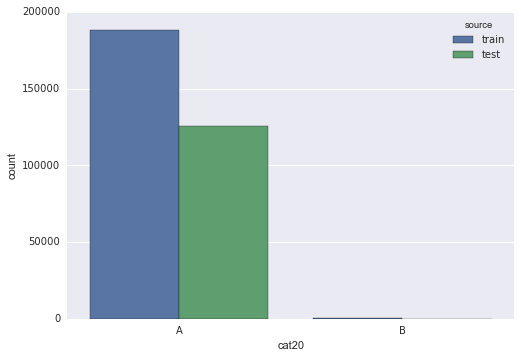

In [142]:
#Can use this to compare training and testing for different variables. Do they look similar?
sns.countplot(x='cat20', hue='source', data=allstate_combined)

In [ ]:
#OK step back
#Whats going on
#We are going to do the dummy creation on the combined data for real this time

#WARNING: This can take a LONG time
allstate_combined_wit_dummies = pd.get_dummies(allstate_combined, columns = cat_names) 

allstate_combined_wit_dummies.shape

#Then we are going to split the combined back into training and testing sets
#allstate_train_prepd = allstate_combined_wit_dummies[allstate_combined_wit_dummies['source_train'] == 1]
#allstate_test_prepd = allstate_combined_wit_dummies[allstate_combined_wit_dummies['source_test'] == 1]

#print(allstate_train_prepd.shape)
#print(allstate_train.shape)

#Then we are going to drop the 'source' variable from both df's, and also the 'loss' variable from the testing df
#allstate_combined
#list(allstate_combined.columns.values)
#print(cat_names)

#We should ALSO be looking at the variance of each variable, and drop any where variance is less than 1% (no mass predictive potential)



In [156]:
allstate_combined_wit_dummies.shape

(313864, 1193)

In [163]:
#Split the training and testing again, and get rid of the respective marker variables

allstate_train_prepd = allstate_combined_wit_dummies[allstate_combined_wit_dummies['source'] == 'train']
allstate_test_prepd = allstate_combined_wit_dummies[allstate_combined_wit_dummies['source'] == 'test']

allstate_train_prepd.drop('source', axis=1, inplace=True)
allstate_test_prepd.drop('source', axis=1, inplace=True)
allstate_test_prepd.drop('loss', axis=1, inplace=True)

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [165]:
print(allstate_train_prepd.shape)
print(allstate_test_prepd.shape)

(188318, 1192)
(125546, 1191)


**OK** So at this point we have made dummy variables in both the training and testing  
If we want to drop any variables w/ low variance, we should go back to the combined, 'dummy-fied' df and do it there ... then split again

** Two possible reasons for future model problems **  
1) We dropped all the variables w/ low variance  
2) Maybe there are bigger differences between the training and testing datasets  

In [166]:
#Export the dummy-fied dataframes
#NOTE THIS IS ALREADY DONE AND IT TAKES A WHILE. AVOID IF YOU CAN
allstate_train_prepd.to_csv("train_with_dummies.csv")
allstate_test_prepd.to_csv("test_with_dummies.csv")